In [9]:
%run '00_database_connectivity_setup.ipynb'
%matplotlib inline
from IPython.display import display
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline


In [19]:
%%execsql
CREATE OR REPLACE FUNCTION nate.calculate_replaced() RETURNS text AS $$

DECLARE
        
        msg text = 'this';
        test text := 'test';
            
        done bool := false;
        tmpcnt1 int := 0;
        tmpcnt2 int := 0;
        servicecount int;
        
        tmpmat text;
        tmpcmp text;
        
BEGIN
    
    TRUNCATE TABLE nate.calculations;
    
    
    FOR tmpcmp,tmpcnt1
    IN SELECT component,count(DISTINCT ordr) FROM nate.simple_features
    WHERE plant='EWHG'
    GROUP BY 1
    LOOP
    
    servicecount := 0;
        
        FOR tmpmat,tmpcnt2
        IN SELECT material,count(DISTINCT ordr) FROM nate.simple_features
        WHERE plant='EWHG'
        GROUP BY 1
        LOOP
        
            IF (tmpcmp IN (SELECT ( component::text) FROM data_science.partbom_exploded_int WHERE tmpmat = material::text))
            THEN servicecount := (servicecount + tmpcnt2);
            END IF;
    
        END LOOP;

        INSERT INTO nate.calculations VALUES (tmpcmp, tmpcnt1, servicecount);
                                       
    END LOOP;
        
        RETURN ('Use ' || $1 || ' to ' || test);

END;
$$ LANGUAGE plpgsql
 

In [6]:
%%showsql
    

SELECT component, count(DISTINCT ordr) as orders_replaced FROM nate.simple_features
WHERE plant='EWHG'
GROUP BY 1
limit 10;

 

,component,count
0,P1000165869,1
1,P163143,1
2,P150426,3
3,P1000083512,1
4,P1000142444,2
5,48-500-038,1
6,P1000011678,3
7,P1000018400,1
8,P103325-0003,1
9,P6000010504,1


In [ ]:
%%showsql 
select * from nate.calculate_replaced()

In [5]:
%%showsql
select * from sap_bi.bic_azcs_o0100_int limit 5


,cs_order,recordmode,coord_type,assembly,ord_proccd,ord_procwd,unit_day,equipment,calday,pmacttype,pmplangrp,planplant,customer,storno,division,funct_loc,salesorg,distr_chan,order_tot,ord_open,ord_immed,ord_intime,ord_unplnd,bic_zabckz,spl_refdt,bic_zreftime,bic_zaenam,bic_zaezeit,bic_zakknz,bic_zsystatus,aedat,bic_zarmsetup,bic_zuserstat,bic_zaufpl,bic_zawerk,plantsectn,comp_code,bic_zcallsign,bic_zchg_by,bic_zcrt_by,cpr_create,bic_zcrtdat,gm_ussta,gm_grntp,bic_zextid,bic_zfligtim,bic_zflgdurut,bic_zforcecnt,bic_zactrel,bic_zreledt,...,bic_zphase,bic_zisflight,me_order,bic_zord_itms,co_area,costcenter,bic_zcryptost,bic_zlanddat,bic_zlandloc,bic_zlandtmzn,bic_zlattkoff,bic_zlanchpad,bic_zlogsys,bic_zmission,bic_zwsid,bic_zmsgrp,bic_zperson,bic_zopercnt,cpr_zuguid,cpr_cobjec,bic_zotype,bic_zplvar,bic_zorplind,priority,bic_zqmnum,revision,bic_zstartdt,bic_zstime,pp_locat,maintplant,cpr_cet,bic_ztgloc,bic_ztmovertg,bic_zsaleoff,bic_zsalesgrp,bic_zmainitm,bic_zmainplan,ord_closed,ord_plnd,bic_zernam,bic_zzstatus,bic_ztimzone,bic_zworkcntr,bic_zoperid,bic_zdesc,bic_zopobjtyp,bic_zordrnrun,bic_zchgdate,bic_zcredate,bic_zobjnr
0,000001277176,,ZS02,,7.0,5.0,10,000000000010305289,20131107,121,230,KOS2,0000045036,,01,,KOS2,01,1,0,0,0,1,,20131204,120000,BACKGROUND,171617,,CLSD CNF CCOK GMPS PPRT PRC SETC,20131204,,,1001737593,KOS2,,KOS1,,,,00000000,151611,,,,00000000000,0000,000000,20140124,20140212,...,6,,,000000,KOS1,,,00000000,,000000,000000,,,,,,000,000000,,00000000,A,,,,,,00000000,000000,,,CST,,000000,,,,,1,0,SANGOLK,,,1333MUUM,,,,0,20140505,00000000,OR000001277176
1,000001277416,,ZS02,,41.0,29.0,10,000000000010973648,20131108,131,230,KOS2,0000045036,,01,,KOS2,01,1,0,0,1,1,,20140214,120000,BACKGROUND,171626,,CLSD CNF CCOK GMPS PPRT PRC SETC,20140214,,,1001738336,KOS2,,KOS1,,,,00000000,122222,,,,00000000000,0000,000000,20140110,20140110,...,6,,,000000,KOS1,,,00000000,,000000,000000,,,,,,000,000000,,00000000,A,,,,,,00000000,000000,,KOS2,CST,,000000,,,,,1,0,SANGOLK,,,1345-GDF,,,,0,20140505,00000000,OR000001277416
2,000001277487,,ZS02,,35.0,21.0,10,000000000010018925,20131108,131,210,KOS2,0000045036,,01,,KOS2,01,1,0,0,1,1,A,20131219,120000,BACKGROUND,171727,,CLSD CNF CCOK GMPS PPRT PRC SETC,20131219,,,1001738783,KOS2,,KOS1,,,,00000000,173227,,,,00000000000,0000,000000,20131108,20131129,...,6,,,000000,KOS1,0000001321,,00000000,,000000,000000,,,,,,000,000000,,00000000,A,,,,,,00000000,000000,,KOS2,CST,,000000,,,,,1,0,SANGOLK,,,1333-E,,,,0,20140305,00000000,OR000001277487
3,000001276064,,ZS02,,17.0,11.0,10,000000000011941607,20131031,120,210,KOS2,0000045036,,01,,KOS2,01,1,0,0,1,1,,20140108,120000,BACKGROUND,171528,,CLSD CNF CCOK GMPS PPRT PRC SETC,20140108,,,1001732614,KOS2,,KOS1,,,,00000000,132232,,,,00000000000,0000,000000,20140108,20140131,...,6,,,000000,KOS1,0000001321,,00000000,,000000,000000,,,,,,000,000000,,00000000,A,,,,,,00000000,000000,,KOS2,CST,,000000,,,,,1,0,RASMUMA,,,1333MUUM,,,,0,20140505,00000000,OR000001276064
4,000001278617,,ZS02,,3.0,1.0,10,000000000013228494,20131115,121,230,KOS2,0000045036,,01,,KOS2,01,1,0,0,1,1,,20131115,120000,KOLSTAT,132824,,CLSD CNF CCOK GMPS PPRT PRC SETC,20131115,,,1001743791,KOS2,,KOS1,,,,00000000,101511,,,,00000000000,0000,000000,20131115,20131122,...,6,,,000000,KOS1,,,00000000,,000000,000000,,,,,,000,000000,,00000000,A,,,,,,00000000,000000,,KOS2,CST,,000000,,,,,1,0,OLSEMAY,,,1333MUUM,,,,0,20140313,00000000,OR000001278617


In [4]:
%%showsql
select * from data_science.ordercomponents_int limit 5

,ordr,oper,bomitem,reservationno,resvitem,reqtyp,deleted,material,plant,sloc,qtyreqd,qtywithdrawn,uom,valuewithdrawn,crcy
0,1238409,0010,20,52525127,2,AR,1,P1000091011,KOS2,0001,2.0,2.0,EA,2466.17,NOK
1,1238466,0020,10,52525257,1,AR,1,200022138,KOS2,B003,1.0,1.0,EA,0.01,NOK
2,1238466,0010,20,52525257,3,AR,1,P6000045332,KOS2,0001,1.0,1.0,EA,1922.65,NOK
3,1238466,0010,30,52525257,4,AR,1,P6000041818,KOS2,0001,2.0,2.0,EA,5775.90,NOK
4,1238467,0020,10,52525258,1,AR,1,200022138,KOS2,B003,1.0,1.0,EA,0.01,NOK


In [9]:
%%showsql
select count(*) from nate.simple_features where plant = 'EWHG'

,count
0,10038


In [24]:
%%showsql
select * from nate.simple_features limit 5

,ordr,material,material_desc,component,component_desc,qtywithdrawn,uom,plant
0,1300963,P1000049342,"UWD-HC, ASSY, F/ 18 3/4 SINGLE TRIP TOOL",79-030-358,"CAP SCREW, HEX SOCKET DRIVE, .375-16UNC-",2.0,EA,HCS0
1,1250437,P2000046597,"UWD-15, ASSY, F/ 30/36 F/ CONDUCTOR HOUS",P1000086341,"CAP SCREW, HEX SOCKET DRIVE, .750-10UNC-",6.0,EA,KOS2
2,1250437,P2000046597,"UWD-15, ASSY, F/ 30/36 F/ CONDUCTOR HOUS",P1000086341,"CAP SCREW, HEX SOCKET DRIVE, .750-10UNC-",16.0,EA,KOS2
3,1411146,P1000027980,"UWD-SB, STABILIZER SUB, F/ DRILL AHEAD W",P114561-0000,"CAP SCREW, HEX SOCKET DRIVE, .750-10UNC-",3.0,EA,HCS0
4,1411146,P1000027980,"UWD-SB, STABILIZER SUB, F/ DRILL AHEAD W",P114561-0000,"CAP SCREW, HEX SOCKET DRIVE, .750-10UNC-",3.0,EA,HCS0


In [3]:
%%showsql
select * from data_science.partbom_exploded_int limit 5

,plant,material,lvl,component,qty,unit
0,EWHG,02-411-062,0,02-411-063,1.0,EA
1,EWHG,02-411-062,0,3232434,1.0,EA
2,EWHG,02-411-062,0,86-693-001,1.0,EA
3,EWHG,02-411-062,0,86-691-090,1.0,EA
4,EWHG,02-411-062,0,88-030-080,1.0,EA


In [14]:
%%execsql
DROP TABLE IF EXISTS nate.calculations;
CREATE TABLE nate.calculations (material text, replaced int, serviced int);
--add column to table to represent avg qty needed when replaced

In [31]:
%%showsql
SELECT DISTINCT component, count(DISTINCT ordr) 
    FROM nate.simple_features
    WHERE plant = 'EWHG'
    GROUP BY 1
    

,component,count
0,P1000030070,1
1,P1000085166,1
2,P1000056980,12
3,P103560-0012,1
4,P132725-0000,3
5,P1000116976,2
6,P112918-0000,3
7,P1000068440,1
8,P166064,1
9,P168398,1


In [34]:
%%showsql
SELECT a.material, array_agg(DISTINCT b.component)
FROM nate.simple_features a, data_science.partbom_exploded_int b
WHERE a.material = b.material
GROUP BY a.material

,material,array_agg
0,100000911,"[100001149, 100001668, 100040260, 200000437, 200004257, 200005662, 200005953, 200008275, 200015319, 7104248, 7104250, 7104251, 7104252, 7104253, 7104255, P6000013330, P6000124671]"
1,100009270,"[100001135, 100001136, 200000388, 200000403, 200004341, 200006993, 200008269, 200008270, 200012723, 200012724, 200014121, 200019087, 3813824, 7104257, 7104904, 7104906, 7104907, 7104908, 7104909, 7104912, 7105034]"
2,100026016,"[100026474, 100026521, 200000403, 200004341]"
3,100026127,"[100001136, 100026126, 200000403, 200004341]"
4,100038559,"[200005293, 3813824, P6000020302, P6000039467, P6000039468, P6000058122]"
5,100048872,"[100001135, 100001136, 100047542, 200000403, 200001671, 200002751, 200004341, 200004799, 200004800, 200004801, 200014121, 200019087, 7104257, P6000074120, P6000123716]"
6,172-015-011,"[172-015-009, 180-700-831, 19-2208216-084, 700-002-263, 708-714-003, 708-839-003, 709-030-190]"
7,18-150-000,"[18-150-002, 18-150-004, 18-150-006, 18-150-007, 18-150-009, 18-150-010, 18-150-012, 48-104-027, 48-108-016, 48-180-022, P1000099765]"
8,18-187-410,"[18-187-404, 18-187-405, 18-187-406, 18-187-407, 18-187-411, 18-187-412, 18-187-413, 18-320-752, 19-200-800, 19-501-530, 48-082-991, 48-180-041, P111623-0014, P166334]"
9,18-222-290,"[18-222-275, 18-222-285, 18-222-291, 18-222-292, 18-222-294, 18-320-396, 70-760-937, 70-760-938, 70-760-982, 79-030-440, P124815-0014]"


In [12]:
%%execsql        
DROP TABLE IF EXISTS nate.replacedvsserviced;
CREATE TABLE nate.replacedvsserviced AS (
SELECT cs.component    
    , case when orders_replaced is not null then orders_replaced else 0 end as orders_replaced
    , orders_serviced
    , 1.0 * case when orders_replaced is not null then orders_replaced else 0.0 end / orders_serviced as pctreplaced
FROM
(
    SELECT b.component , count(DISTINCT a.ordr)  as orders_serviced
    FROM nate.simple_features a
    INNER JOIN  data_science.partbom_exploded_int b
    on a.material=b.material
    WHERE a.plant='EWHG'
    group by 1
) cs
LEFT OUTER JOIN
(
    SELECT component, count(DISTINCT ordr) as orders_replaced 
    FROM nate.simple_features
    WHERE plant='EWHG'
    GROUP BY 1
) cr
on cs.component=cr.component
order by 4 desc)

        

 

In [16]:
%%execsql
DROP TABLE IF EXISTS nate.replacedvsservicedsum;
select madlib.summary('nate.replacedvsserviced','nate.replacedvsservicedsum')

In [17]:
%%showsql
SELECT * FROM nate.replacedvsservicedsum;

,group_by,group_by_value,target_column,column_number,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,None,None,component,1,varchar,15843,15843,0,0.0,0.0,0.0,NaN,NaN,7.0,15.0,NaN,NaN,NaN,"[P1000069951, 48-082-201, 48-081-951, P1000019714, P1000019517, P164581, P159045, P1000027861, 18-307-106, P1000095209]","[17, 16, 16, 15, 15, 14, 14, 14, 13, 13]"
1,None,None,orders_replaced,2,int8,15843,27,0,NaN,0.0,NaN,0.246292,1.630158,0.0,76.0,0.0,0.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110]"
2,None,None,orders_serviced,3,int8,15843,202,0,NaN,0.0,NaN,12.301458,699.655109,1.0,277.0,1.0,3.0,11.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4947, 4947, 4947, 4947, 4947, 4947, 4947, 4947, 4947, 4947]"
3,None,None,pctreplaced,4,numeric,15843,322,0,NaN,0.0,NaN,0.042424,0.395009,0.0,76.0,0.0,0.0,0.0,"[0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000, 0.00000000000000000000]","[14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110, 14110]"


In [10]:
%%showsql
SELECT * FROM nate.replacedvsserviced limit 100;

,component,orders_replaced,orders_serviced,pctreplaced
0,P1000088483,2,2,1.000000
1,48-500-248,2,2,1.000000
2,P6000007736,1,1,1.000000
3,P1000050882,1,1,1.000000
4,P165576,1,1,1.000000
5,P150784,1,1,1.000000
6,P211785,3,3,1.000000
7,P1000045859,1,1,1.000000
8,48-081-966,2,3,0.666667
9,P1000026143,3,5,0.600000


In [3]:
%%showsql
SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced;

,q1,q2,q3,q4
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,False,True
9,False,False,False,True


In [18]:
sql = """
SELECT count((case when q1 = true then 1 else NULL end)) as bin1, count(case when q2 = true then 1 else NULL end) as bin2, 
        count(case when q3 = true then 1 else NULL end) as bin3, count(case when q4 = true then 1 else  NULL end) as bin4 FROM
(SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced) a;
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)


,bin1,bin2,bin3,bin4
0,14260,94,99,1390


Need to refine

In [16]:
sql = """--(SELECT ('bin1', 'bin2', 'bin3', 'bin4') as bin) JOIN 
        SELECT count((case when q1 = true then 1 else NULL end)) FROM (SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced) a
        UNION SELECT count(case when q2 = true then 1 else NULL end) FROM (SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced) a UNION 
        SELECT count(case when q3 = true then 1 else NULL end) FROM (SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced) a UNION SELECT count(case when q4 = true then 1 else  NULL end)  
        FROM (SELECT (pctreplaced <= 0.02) as q1, 
        (pctreplaced > 0.02 AND pctreplaced <= 0.03) as q2, 
        (pctreplaced > 0.03 AND pctreplaced <= 0.04) as q3,
        (pctreplaced > 0.04) as q4 FROM nate.replacedvsserviced) as count;
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)


,count
0,1390
1,94
2,14260
3,99


In [27]:
sql = """SELECT pctreplaced FROM nate.replacedvsserviced WHERE pctreplaced > 0 AND pctreplaced < 1;
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)


,pctreplaced
0,0.800000
1,0.666667
2,0.545455
3,0.500000
4,0.500000
5,0.500000
6,0.333333
7,0.272727
8,0.250000
9,0.250000


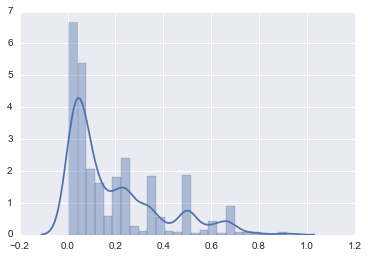

In [29]:
sns.distplot(df, hist=True)

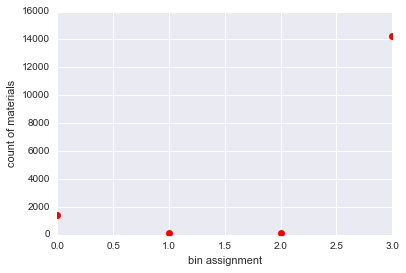

In [7]:
plt.plot(df,'ro')
plt.xlabel('bin assignment')
plt.ylabel('count of materials')
plt.show()
#... 

Bin 0 is less than 0.02 pctreplaced, Bin 1 is 0.02 - 0.03, Bin 2 is 0.03 - 0.04 and Bin 3 is 0.04+ - as Bin 3 covers a much larger area than all the other bins, this is expected, further analysis required

In [4]:
%%showsql
SELECT *
FROM nate.replacedvsserviced

,component,orders_replaced,orders_serviced,pctreplaced
0,P155124,1,1,1.000000
1,P135185-0000,1,1,1.000000
2,48-081-881,1,1,1.000000
3,90-139-080,1,1,1.000000
4,P134305-0000,6,6,1.000000
5,P206198,6,6,1.000000
6,48-081-950,3,3,1.000000
7,P1000086655,1,1,1.000000
8,79-030-334,1,1,1.000000
9,P1000049127,9,14,0.642857


In [4]:
%%showsql
SELECT count(*)
FROM nate.replacedvsserviced
WHERE (pctreplaced <> 0 AND pctreplaced is not null)

,count
0,1733


In [5]:
%%showsql
SELECT count(*)
FROM nate.replacedvsserviced


,count
0,15843
